# Example Customer Satisfaction Survey

In [1]:
from FictionalDataGenerator import MakeData
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_theme(style="ticks")

In [2]:
# Create a customer satisfaction survey
maker = MakeData(n_subjects=1000)

In [3]:
# Product quality factor (normally distributed)
maker.add_factor(
    name="quality",
    n_items=4,
    distribution="normal",
    mean=3.8,  # People generally rate product quality well
    std=0.9
)

In [4]:
# Customer service factor (bimodal - people either love it or hate it)
maker.add_factor(
    name="service",
    n_items=3,
    distribution=[0.30, 0.10, 0.05, 0.15, 0.40]  # U-shaped distribution
)

In [5]:
# Value for money factor (slightly negatively skewed)
maker.add_factor(
    name="value",
    n_items=3,
    distribution=[0.25, 0.30, 0.25, 0.15, 0.05]
)

In [6]:
# Generate the data
df = maker.run()

# Calculate mean scores for each factor's items
for factor in ['quality', 'service', 'value']:
    item_cols = [col for col in df.columns if col.startswith(f"{factor}_")]
    df[f"{factor}_score"] = df[item_cols].mean(axis=1)

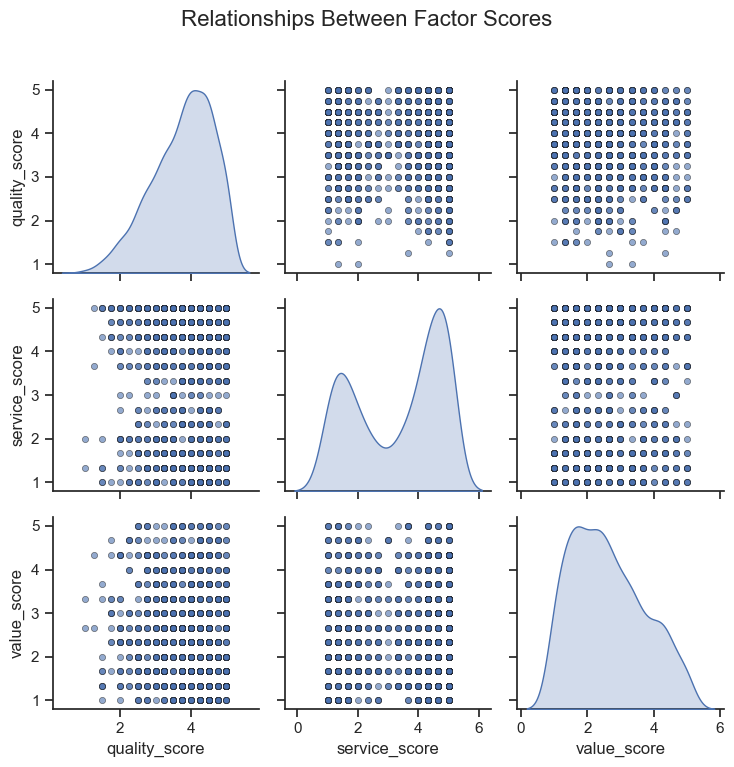

In [7]:
# Create a pairplot of the factor scores
sns.pairplot(
    df[["quality_score", "service_score", "value_score"]], 
    kind='scatter',
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 20, 'edgecolor': 'k', 'linewidth': 0.5})
plt.suptitle('Relationships Between Factor Scores', y=1.02, fontsize=16)
plt.tight_layout()

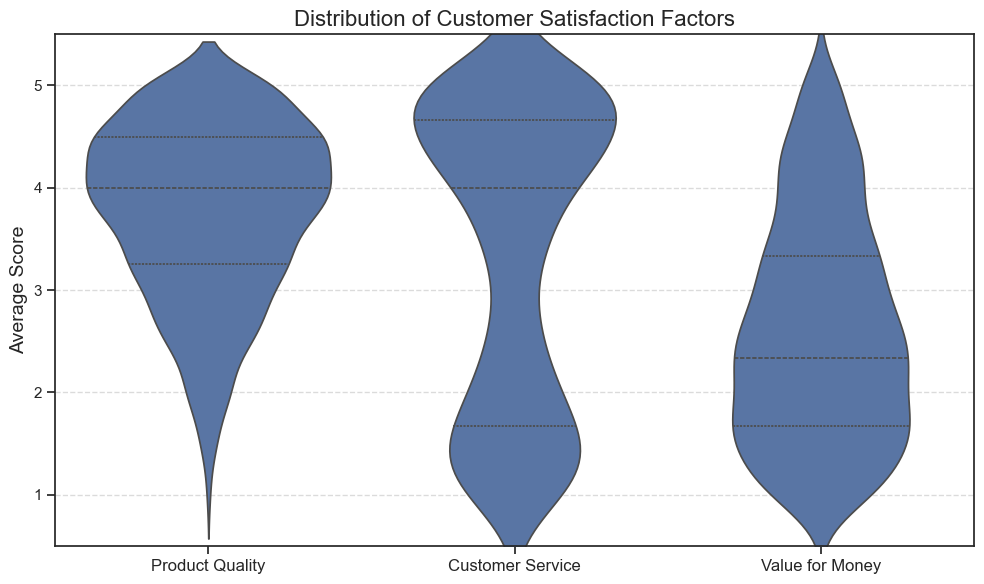

In [8]:
# Create a violin plot showing the distribution of each factor
plt.figure(figsize=(10, 6))
factor_scores = pd.melt(
    df[["quality_score", "service_score", "value_score"]], 
    var_name='Factor', 
    value_name='Score')

sns.violinplot(
    x="Factor", 
    y="Score", 
    data=factor_scores, 
    inner="quartile")

plt.title('Distribution of Customer Satisfaction Factors', fontsize=16)
plt.ylabel('Average Score', fontsize=14)
plt.xlabel('', fontsize=14)
plt.xticks(plt.xticks()[0], ['Product Quality', 'Customer Service', 'Value for Money'], fontsize=12)
plt.ylim(0.5, 5.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

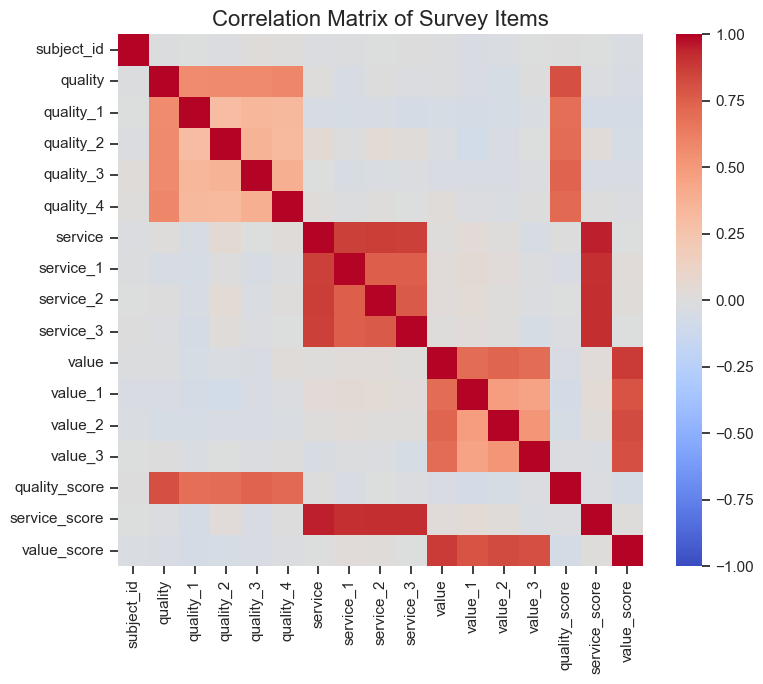

In [11]:
# Visualize correlation matrix using Seaborn
plt.figure(figsize=(8, 7))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Survey Items', fontsize=16)
plt.tight_layout()

In [9]:
df.to_csv('ExCustomerSatisfaction.csv', index=False)